In [1]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
import matplotlib.font_manager as fm # needed to export editable text
from scipy import stats
import random

# needed for editable text in svg format
plt.rcParams['svg.fonttype'] = 'none'


# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [2]:
# # set up matplotlib fonts
# plt.rc('font', family="hel")
# plt.rcParams.update({'font.size':12})
# font = fm.FontProperties(family = "Helvetica")
# # use plt.title('title_str', fontproporties = font)

In [3]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
# out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/figure_pics/'
out_path = "/Users/eisko/Documents/CSHL/mapseq_paper/svg_images/"

In [4]:
#### load data
# with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
#     omc_bin = pickle.load(f)   
omc_bin = pd.read_pickle(in_path+"M194_M220_OMC_bin4.pkl")

#### load data
# with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
#     omc_countN = pickle.load(f)
omc_countN = pd.read_pickle(in_path+"M194_M220_OMC_countN4.pkl")


#     #### load data
# with open(in_path +'M194_M220_ACA_bin4.pkl', 'rb') as f:
#     aca_bin = pickle.load(f)   

# #### load data
# with open(in_path +'M194_M220_ACA_countN4.pkl', 'rb') as f:
#     aca_countN = pickle.load(f)

# Data Processing

In [5]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]
omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median

# countN processing
omc_cleanN = [clean_up_data(df) for df in omc_countN]
omc_typeN = [sort_by_celltype(df) for df in omc_cleanN]
omc_preprocessN = dfs_preprocess_counts(omc_typeN) # normalize by dataset median



# Infectivity

In [ ]:
infect_df = pd.DataFrame(columns=["Unique Barcodes", "mice", "species", "dataset"])

for i in range(metadata.shape[0]):
    infect_df.loc[i,"Unique Barcodes"] = omc_type[i].shape[0]
    infect_df.loc[i, "mice"] = metadata.loc[i,"mice"]
    infect_df.loc[i,"species"] = metadata.loc[i, "species"]
    infect_df.loc[i, "dataset"] = metadata.loc[i, "dataset"]

dot_plot(infect_df, to_plot="Unique Barcodes")
plt.savefig(out_path+"infectivity_uBC_dotplot.svg", dpi=300, bbox_inches="tight")
plt.show()

# Heatmaps

## individual animal

In [ ]:
col_order = ["OMCc", "AUD", "STR", 'TH',  "AMY", 'HY', 'SNr', 'SCm', 'PG', 'PAG',
             'BS', 'OMCi', 'type']


In [ ]:
# omc_preprocess_rename = [df.rename(columns={"AUD":"AUD/TEa"}) for df in omc_preprocess]
# omc_preprocessN_rename = [df.rename(columns={"AUD":"AUD/TEa"}) for df in omc_preprocessN]


In [ ]:
# plot STF6 only, mice[10]
i=10



sort_order = ['type', 'OMCc', 'AUD',  'STR', 'TH', 'AMY', 'HY', 'SNr', 'SCm', 'PG', 'PAG',
       'BS']
neurons = {"a":100, "b":740, "c":795, "d":810, "e":900, "f":960}

# title_n = mice[i]+", total neurons = "+str(omc_preprocess_rename[i].shape[0])
title_n = ""

# specify column order by highest -> lowest projecting
col_order = omc_preprocess[i].sum().drop('type').sort_values(ascending=False).index.tolist()+["type"]

# # binary
# all_idx, fig = sorted_heatmap(omc_preprocess[i][col_order], sort_by=sort_order, sort_ascend=True, title=title_n, drop=["OMCi"],
#                label_neurons=neurons)

# counts
all_idx, fig = sorted_heatmap(omc_preprocessN[i][col_order], sort_by=sort_order, sort_ascend=True, 
                              title=title_n, drop=["OMCi"], label_neurons=neurons, norm=LogNorm(),
                              cbar=True)

# rotate xtick labels 45 degrees
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')

# set cbar label
ax = plt.gca()
ax.collections[0].colorbar.set_label("Normalized Counts")

plt.savefig(out_path+"OMC_heatmap_mapseq_STF6.svg", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:

neurons_idx = {}
for key in neurons:
    neurons_idx[key] = all_idx[neurons[key]]

for key in neurons_idx:
       # single_neuron_bar(omc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plot = omc_preprocessN[i][col_order]
       single_neuron_bar(plot, neurons_idx[key], label=key, sort_by=[], row_norm=False, ylim=9)
       if key=="f":
             plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
       else:
             plt.tick_params(labelbottom=False)
       plt.savefig(out_path+"OMC_heatmap_mapseq_STF6"+"neuron_"+key+".svg", dpi=300, bbox_inches="tight")
       plt.show()
       

## MMus

In [ ]:
plot_order = ["STR", "OMCc", "AUD", "TH", "AMY", "HY", "PG", "PAG", "SNr", "SCm", "BS", "type"]

In [ ]:
# plot MMM4 only, mice[6]
i=6

sort_order = ['type', 'OMCc', 'AUD',  'STR', 'TH', 'AMY', 'HY', 'SNr', 'SCm', 'PG', 'PAG',
       'BS']
neurons = {"a":110, "b":750, "c":825, "d":840, "e":900, "f":940}

# title_n = mice[i]+" 1000 neurons plotted\ntotal neurons = "+str(omc_preprocess[i].shape[0])
title_n = ""


# only plot 1000 cells for visualization purposes
n_1000 = omc_preprocessN[6].sample(1000, random_state=10)

# specify column order by highest -> lowest projecting
# col_order = omc_preprocess_rename[i].sum().drop('type').sort_values(ascending=False).index.tolist()+["type"]


all_idx, fig = sorted_heatmap(n_1000[plot_order], sort_by=sort_order, sort_ascend=True, title=title_n,
                              drop=[], cmap=blue_cmp, label_neurons=neurons, norm=LogNorm(),
                              cbar=True)
# all_idx, fig = sorted_heatmap(omc_preprocess_rename[i][col_order], sort_by=sort_order, sort_ascend=True, title=title_n, drop=["OMCi"],
#                label_neurons=neurons)


# rotate xtick labels 45 degrees
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')

# set cbar label
ax = plt.gca()
ax.collections[0].colorbar.set_label("Normalized Counts")

plt.savefig(out_path+"OMC_heatmap_mapseq_MMM4.svg", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:

neurons_idx = {}
for key in neurons:
    neurons_idx[key] = all_idx[neurons[key]]

for key in neurons_idx:
       # single_neuron_bar(omc_preprocessN_rename[i], neurons[key], label=key, sort_by=[])
       plot = omc_preprocessN[i][col_order]
       single_neuron_bar(plot, neurons_idx[key], label=key, sort_by=[], cmap=blue_cmp, 
                         col_order=plot_order[:-1], row_norm=False, ylim=23)
       if key=="f":
             plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
       else:
             plt.tick_params(labelbottom=False)
       plt.savefig(out_path+"OMC_heatmap_mapseq_MMM4"+"neuron_"+key+".svg", dpi=300, bbox_inches="tight")
       plt.show()
       

## n=1000 species summary

In [ ]:
# plot 1000 neurons sampled from all only
stidx = [i for i in range(len(species)) if species[i]=="STeg"]
omc_st = np.take(omc_preprocess, stidx) # just get steg from list
plot_st = pd.concat(omc_st).reset_index(drop=True)


neurons = {"a":124, "b":800, "c":945}

idx, fig = sorted_heatmap(plot_st, sort_by=sort_order, title="N=7, n=1000", drop=["OMCi"],
               nsample=1000, label_neurons=neurons)
plt.savefig(out_path+"OMC_heatmap_ST_1000.jpg", dpi=300, bbox_inches="tight")
plt.show(fig)


stidx = [i for i in range(len(species)) if species[i]=="STeg"]
omcN_st = np.take(omc_preprocessN, stidx) # just get steg from list
plotN_st = pd.concat(omcN_st).reset_index(drop=True)
plotN = plotN_st.loc[idx,:].reset_index(drop=True)
for key in neurons.keys():
       # single_neuron_bar(omc_preprocessN[i], neurons[key], label=key, sort_by=[])
       plot = plotN[col_order]
       single_neuron_plot(plot, neurons[key], label=key, sort_by=[])
       plt.savefig(out_path+"OMC_heatmap_ST_1000_neuron_"+key+".jpg", dpi=300, bbox_inches="tight")
       plt.show()

# Dot Plots

## Add down Sampled lab and singing mouse
- sample from aggregated dataset, with replacement b/w 'animals'

In [ ]:
# omc_type_rename = [df.rename(columns={"AUD":"AUD/TEa"}) for df in omc_type]
# omc_type_rename[0]

In [6]:
# processing
plot_it = ["AUD", "OMCc"]
plot_pt = ["PAG", "SNr"]

# IT cells
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
omc_it_prop = dfs_to_proportions(omc_it, cell_type="IT")

mm_it_sim = resample_neurons(omc_it, species="MMus")
mm_it_sim_prop = dfs_to_proportions(mm_it_sim, cell_type="IT")
mm_it_sim_prop['species'] = "MMus_resampled"

st_it_sim = resample_neurons(omc_it, species="STeg")
st_it_sim_prop = dfs_to_proportions(st_it_sim, cell_type="IT")
st_it_sim_prop['species'] = "STeg_resampled"

# PT cells
omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
omc_pt_prop = dfs_to_proportions(omc_pt, cell_type="PT", aud_rename=False)

mm_pt_sim = resample_neurons(omc_pt, species="MMus")
mm_pt_sim_prop = dfs_to_proportions(mm_pt_sim, cell_type="PT", aud_rename=False)
mm_pt_sim_prop['species'] = "MMus_resampled"

st_pt_sim = resample_neurons(omc_pt, species="STeg")
st_pt_sim_prop = dfs_to_proportions(st_pt_sim, cell_type="PT", aud_rename=False)
st_pt_sim_prop['species'] = "STeg_resampled"

plot_it = pd.concat([omc_it_prop, mm_it_sim_prop, st_it_sim_prop])
plot_pt = pd.concat([omc_pt_prop, mm_pt_sim_prop, st_pt_sim_prop])

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:261: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, df_add])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:261: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, df_add])
/Users/eisko/github_repos/MAPseq_analysis/MAPseq_processing.py:261: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this w

In [ ]:
# AUD
dot_plot_resample(plot_it, "AUD", title="AUD", add_legend=False)
plt.savefig(out_path+"OMC_AUD_resample_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# OMCc
dot_plot_resample(plot_it, "OMCc", title="OMCc", add_legend=False)
plt.savefig(out_path+"OMC_OMCc_resample_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# PAG
dot_plot_resample(plot_pt, "PAG", title="PAG", add_legend=False)
plt.savefig(out_path+"OMC_PAG_resample_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
dot_plot_resample(plot_pt, "SNr", title="SNr", add_legend=False)
plt.savefig(out_path+"OMC_SNr_resample_dot.svg", dpi=300, bbox_inches="tight")
plt.show()

# Intra vs. Inter comparisons

In [ ]:
d1 = proportion_comparisons(plot_it, species1="MMus", species2="STeg", label="inter")
d2 = proportion_comparisons(plot_it, species1="MMus", species2="MMus", label="intra")
d3 = proportion_comparisons(plot_it, species1="STeg", species2="STeg", label="intra")

result_it = pd.concat([d1, d2, d3])

inter_it = result_it[result_it['label']=="inter"]
intra_it = result_it[result_it['label']=="intra"]

d4 = proportion_comparisons(plot_pt, species1="MMus", species2="STeg", label="inter")
d5 = proportion_comparisons(plot_pt, species1="MMus", species2="MMus", label="intra")
d6 = proportion_comparisons(plot_pt, species1="STeg", species2="STeg", label="intra")

result_pt = pd.concat([d4, d5, d6])

inter_pt = result_pt[result_pt['label']=="inter"]
intra_pt = result_pt[result_pt['label']=="intra"]

# drop str in result_pt so no repeat areas b/w it and pt
result_pt = result_pt[result_pt['area']!="STR"]

result = pd.concat([result_it, result_pt])

# inter = result[result['label']=="inter"]
# intra = result[result['label']=="intra"]

result_means = result.groupby(['label', 'area']).mean().reset_index()
result_means

fig, ax = plt.subplots()
sns.pointplot(result_means, x="label", y="prop_diff", hue="area")
plt.title("OMC - MAPseq proportions")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig(out_path+"inter_intra_paired_mapseq.jpg", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# do paired t-test = significant!
result_means_inter = result_means[result_means['label']=="inter"]
result_means_intra = result_means[result_means['label']=="intra"]

ttest_rel(result_means_inter['prop_diff'], result_means_intra['prop_diff'])

# Compare proportions

# Scatterplots

In [ ]:
# preprocess
plot_it['type'] = "IT"
plot_pt['type'] = "PT"


In [ ]:
# combine IT and PT
sp_stats_it = stvmm_calc_stats(plot_it, species=["STeg", "MMus"])
sp_stats_pt = stvmm_calc_stats(plot_pt, species=["STeg", "MMus"])

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])

stvmm_area_scatter_type(sp_stats, title="OMC")
# plt.savefig(out_path+"OMC_scatter_mapseq_type.jpg", dpi=300, bbox_inches="tight")
plt.show()

## volcano plot

In [ ]:
plot_it['type'] = "IT"
plot_pt['type'] = "PT"
omc_prop = pd.concat([plot_it, plot_pt])
plot = stvmm_calc_ttest(omc_prop, sp1="MMus", sp2="STeg")

plot_volcano(plot, title="OMC MAPseq Proportion", shape="type", fig_size=(7,5.5), p_01=None, ylim=(0, -np.log10(0.01)))
plt.xlim(-2,2)


# plt.savefig(out_path+"OMC_volcano_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
display(sp_stats)
display(plot)

## AUD vs PAG propotion

In [ ]:
omc_prop
omc_prop_select = omc_prop[(omc_prop["species"]=="MMus") | (omc_prop["species"]=="STeg")]
omc_prop_aud = omc_prop_select[(omc_prop_select['area']=="AUD")].reset_index(drop=True)
omc_prop_pag = omc_prop_select[(omc_prop_select['area']=="PAG")].reset_index(drop=True)
omc_prop_aud = omc_prop_aud.rename(columns=({'proportion':'aud_prop'}))
omc_prop_aud['pag_prop'] = omc_prop_pag['proportion']
plot_df = omc_prop_aud.copy().drop(["area", "type"], axis=1)
plot_df

sns.scatterplot(plot_df, x="aud_prop", y="pag_prop",hue="species",
                s=100)
plt.xlabel("AUD Proportion")
plt.ylabel("PAG Proportion")

plt.xlim(0,0.7)

plt.savefig(out_path+"omc_proportion_AUDvPAG2.svg", dpi=300, bbox_inches="tight")

In [ ]:
# scatter and volcano plot for comparing resampled data
# combine IT and PT
sp_stats_it = stvmm_calc_stats(plot_it, species=["STeg_resampled", "MMus_resampled"])
sp_stats_pt = stvmm_calc_stats(plot_pt, species=["STeg_resampled", "MMus_resampled"])

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])
sp_stats


stvmm_area_scatter_type(sp_stats, title="OMC - Resampled", x="STeg_resampled", y="MMus_resampled")
# plt.savefig(out_path+"OMC_scatter_mapseq_resampled.jpg", dpi=300, bbox_inches="tight")
plt.show()
## volcano plot
omc_prop = pd.concat([plot_it, plot_pt])
plot = stvmm_calc_ttest(omc_prop, sp1="MMus_resampled", sp2="STeg_resampled")

plot_volcano(plot, title="OMC MAPseq Proportion - Resampled", shape="type")
plt.xlim(-3,3)


# plt.savefig(out_path+"OMC_volcano_mapseq_resampled.jpg", dpi=300, bbox_inches="tight")


# compare number of cells

In [ ]:
omc_preprocess[0]

# make dataframe w/ # unique barcodes per animal

nBC_df = pd.DataFrame(columns=["Total Neurons", "IT Neurons", "CT Neurons", "PT Neurons",
                               "mice", "species", "dataset"])

for i in range(metadata.shape[0]):
    df = omc_preprocess[i]
    tot = df.shape[0]
    it = df[df['type']=="IT"].shape[0]
    ct = df[df['type']=="CT"].shape[0]
    pt = df[df['type']=="PT"].shape[0]

    row = [tot, it, ct, pt, metadata.loc[i,"mice"], metadata.loc[i,"species"], metadata.loc[i,"dataset"]]

    nBC_df.loc[i] = row

nBC_df

In [ ]:
area_proportion_dot_plot(nBC_df, title="All Unique Barcodes - OMC",
                         to_plot="Total Neurons", add_legend=False)
plt.savefig(out_path+"uBC_OMC_all.jpg", dpi=300, bbox_inches="tight")
plt.show()

area_proportion_dot_plot(nBC_df, title="IT Unique Barcodes - OMC",
                         to_plot="IT Neurons", add_legend=False)
plt.show()

area_proportion_dot_plot(nBC_df, title="CT Unique Barcodes - OMC",
                         to_plot="CT Neurons", add_legend=False)
plt.show()

area_proportion_dot_plot(nBC_df, title="PT Unique Barcodes - OMC",
                         to_plot="PT Neurons", add_legend=False)
plt.show()



# PCA  to cluster animals

In [7]:
it_df = omc_it_prop.pivot(index="mice", columns="area", values="proportion")
pt_df = omc_pt_prop.pivot(index="mice", columns="area", values="proportion")

all_df = pd.concat([it_df, pt_df], axis=1)

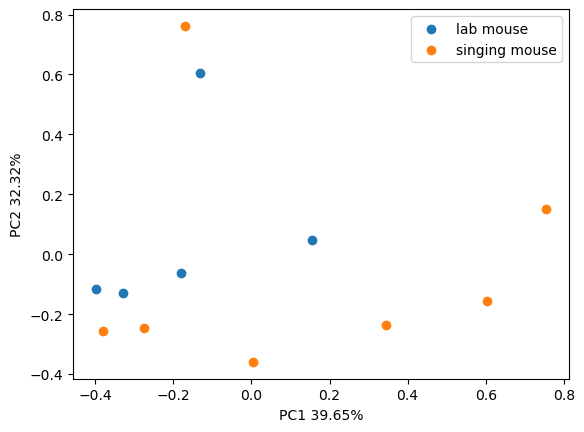

<Figure size 640x480 with 0 Axes>

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(all_df)
explain_var = pca.explained_variance_ratio_

# plot pcs
plt.scatter(principalComponents[0:5,0], principalComponents[0:5,1], label="lab mouse")
plt.scatter(principalComponents[5:12,0], principalComponents[5:12,1], label="singing mouse")
plt.xlabel("PC1 "+ str(round(explain_var[0], 4)*100)+ "%")
plt.ylabel("PC2 "+ str(round(explain_var[1], 4)*100)+ "%")
plt.legend()
plt.show()
plt.savefig(out_path+"omc_prop_pca12.svg", dpi=300, bbox_inches="tight")

In [ ]:
plt.scatter(principalComponents[0:5,1], principalComponents[0:5,2], label="lab mouse")
plt.scatter(principalComponents[5:12,1], principalComponents[5:12,2], label="singing mouse")
plt.xlabel("PC2 "+ str(round(explain_var[1], 4)*100)+ "%")
plt.ylabel("PC3 "+ str(round(explain_var[2], 4)*100)+ "%")
plt.legend()
plt.show()
plt.savefig(out_path+"omc_prop_pca23.svg", dpi=300, bbox_inches="tight")

In [ ]:
from mpl_toolkits import mplot3d

# plt.scatter(principalComponents[0:5,1], principalComponents[0:5,2], label="lab mouse")


# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(principalComponents[0:5,0], principalComponents[0:5,1], principalComponents[0:5,2], label="lab mouse")
ax.scatter3D(principalComponents[5:12,0], principalComponents[5:12,1], principalComponents[5:12,2], label="singing mouse")
ax.set_xlabel("PC1 "+ str(round(explain_var[0], 4)*100)+ "%")
ax.set_ylabel("PC2 "+ str(round(explain_var[1], 4)*100)+ "%")
ax.set_zlabel("PC3 "+ str(round(explain_var[2], 4)*100)+ "%")
plt.legend()
plt.show()

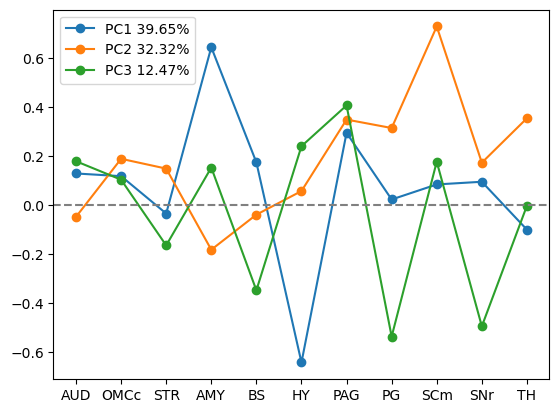

In [38]:
components = pca.components_
plot_pca = pd.DataFrame(components, columns=all_df.columns).T
cols = ["PC"+str(x) for x in range(1,12)]
plot_pca.columns = cols
plot_pca.reset_index(inplace=True)

plt.plot(plot_pca["area"], plot_pca["PC1"], '-o', label="PC1 "+ str(round(explain_var[0], 4)*100)+ "%")
plt.plot(plot_pca["area"], plot_pca["PC2"], '-o', label="PC2 "+ str(round(explain_var[1], 4)*100)+ "%")
plt.plot(plot_pca["area"], plot_pca["PC3"], '-o', label="PC3 "+ str(round(explain_var[2], 4)*100)+ "%")
plt.legend()
plt.axhline(color="gray", linestyle="--")
plt.savefig(out_path+"pca_loadings.png", dpi=300, bbox_inches="tight")
plt.show()



In [12]:
import plotly.express as px

plot_df = pd.DataFrame(principalComponents)
plot_df.index = all_df.index
cols = ["PC"+str(x) for x in range(1,12)]
plot_df.columns = cols
plot_df["species"] = "MMus"
plot_df.iloc[5:12,11] = "STeg"

fig = px.scatter_3d(plot_df, x="PC1", y="PC2", z="PC3",
                    color="species")
fig.show()
